# Med denne notebook stræber jeg efter at opnå 3 ting

1) Arbejde mest pythonic som muligt - korte og stærke process steps, bruge lambda funtioner, list comprehensions hvor muligt
2) Forklare alle steps med kommentarer for at skabe transperans og samtidig gøre det muligt at gengive, hvordan resultaterne er blevet etableret
3) Visualizere data og modeller, for at understøtte findings

# 🔬 Initialization & data wrangling

I denne blok sættes environmentet op, med initialisering af nødvendige libraries samt upload af data. Formålet er at skabe et udgangspunkt for data analyse med python og dets stærke data wrangling toolkits såsom pandas og numpy, data analysis vha. seaborn og kvantitativ analyse hjulpet af machine learning librariet scikit-learn 

In [19]:
!pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.6 MB/s eta 0:00:00


In [20]:
# Indlæs libraries
import pandas as pd
import numpy as np

import missingno as msno

### 1. Indlæs og opsæt data 
Indlæs de forskellige datasæt og saml dem i et.

In [13]:
# Filepaths, tilpas disse til lokal-sti

brancher_fp = r'/Users/albertcortbanke/Case/data/arbejdsmarkedsanalyse_brancher.csv'
koen_alder_fp = r'/Users/albertcortbanke/Case/data/arbejdsmarkedsanalyse_koen_alder.csv'

In [14]:
# Indlæs data med pandas read_csv, brug delimiter = ; til at spalte data korrekt og samtidig enconding = 'latin-1' for at tilpasse encoding til dataet (det er lidt... funky)

branche_data = pd.read_csv(brancher_fp, delimiter = ";", encoding='latin-1')
koen_alder_data = pd.read_csv(koen_alder_fp, delimiter = ";", encoding='latin-1')

In [15]:
# Check at begge data frames er blevet loaded korrekt (i.e ingen formatterings-issues eller lignende)

branche_data # ser super fint ud

,Field Values Index,Ordforklaring,Akse,Farveskala,Field Values Index (Fixed),Navigation - Arbejdsmiljøprofiler,Score (Indekseret score) (gennemsnit),Score (Indekseret score) (gennemsnit) (label),Score (Total) (Fixed),Gennemsnit,...,Main Group,Score,Field Values,Mean,Question Label,Sluttekst,Spm Formulering,Topic Label,Type,Year
0,"49,824544","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"-5,059771093","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,658698159","-2,658698159","2,658698159",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
1,"59,24585073","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"4,361535635","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,566242056","-2,566242056","2,566242056",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
2,"89,95423342","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"35,06991833","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,264884984","-2,264884984","2,264884984",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
3,"44,36525953","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"-10,51905556","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,712272911","-2,712272911","2,712272911",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
4,"85,4477087","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"30,5633936","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,309109817","-2,309109817","2,309109817",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8110,"49,8865146","Spørgsmål: Forestil dig, at din arbejdsevne er...",Score,0,"49,8865146",Arbejdsmiljøprofiler,"83,39333095","8,339333095","8,339333095","8,339333095",...,Job,"8,339333095","8,339333095","8,339333095",Arbejdsevne,\n\n I resultaterne præsenteres den gennemsni...,"Forestil dig, at din arbejdsevne er 10 point v...",Arbejdsevne,kont,2018
8111,"18,11586988","Spørgsmål: Forestil dig, at din arbejdsevne er...",Score,"-31,77064472","49,8865146",Arbejdsmiljøprofiler,"83,39333095","8,339333095","8,339333095",NaN,...,Job,"7,966818788","7,966818788","7,966818788",Arbejdsevne,\n\n I resultaterne præsenteres den gennemsni...,"Forestil dig, at din arbejdsevne er 10 point v...",Arbejdsevne,kont,2018
8112,"66,91324051","Spørgsmål: Forestil dig, at din arbejdsevne er...",Score,"17,02672591","49,8865146",Arbejdsmiljøprofiler,"83,39333095","8,339333095","8,339333095",NaN,...,Job,"8,53897333","8,53897333","8,53897333",Arbejdsevne,\n\n I resultaterne præsenteres den gennemsni...,"Forestil dig, at din arbejdsevne er 10 point v...",Arbejdsevne,kont,2018
8113,"68,80152033","Spørgsmål: Forestil dig, at din arbejdsevne er...",Score,"18,91500573","49,8865146",Arbejdsmiljøprofiler,"83,39333095","8,339333095","8,339333095",NaN,...,Job,"8,561113619","8,561113619","8,561113619",Arbejdsevne,\n\n I resultaterne præsenteres den gennemsni...,"Forestil dig, at din arbejdsevne er 10 point v...",Arbejdsevne,kont,2018


In [16]:
koen_alder_data # ser også super fint ud, kolonnerne er sat rigtigt op og der er index

,Group,Question Label,Topic Label,Year,Akse,Ordforklaring,Antpers,Farveskala,Gennemsnit,Score (Indekseret score) (gennemsnit) (label),Score (Indekseret score) (gennemsnit),Score (Indekseret score),Score
0,"Mænd, 55 - 64 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",5080,"38,852616243",NaN,NaN,NaN,"18,223967423","0,911198371"
1,"Mænd, 45 - 54 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",5367,"29,425529088",NaN,NaN,NaN,"19,637802224","0,981890111"
2,"Mænd, 35 - 44 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",3496,"18,435371488",NaN,NaN,NaN,"21,286059742","1,064302987"
3,"Mænd, 25 - 34 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",1876,"2,222449347",NaN,NaN,NaN,"23,717605476","1,185880274"
4,"Mænd, 18 - 24 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",591,"9,439166690",NaN,NaN,NaN,"22,635272623","1,131763631"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,"Kvinder, 25 - 34 år",Fysisk vold,Vold og trusler,2018,Andel (%),Spørgsmål: Har du indenfor de sidste 12 månede...,2398,"-49,950500909",NaN,NaN,NaN,"9,368183615","9,368183615"
1304,"Kvinder, 18 - 24 år",Trusler,Vold og trusler,2018,Andel (%),Spørgsmål: Har du indenfor de sidste 12 månede...,691,"11,485190120",NaN,NaN,NaN,"7,562770249","7,562770249"
1305,"Kvinder, 18 - 24 år",Fysisk vold,Vold og trusler,2018,Andel (%),Spørgsmål: Har du indenfor de sidste 12 månede...,690,"-20,515149338",NaN,NaN,NaN,"7,334525549","7,334525549"
1306,Kvinder,Trusler,Vold og trusler,2018,Andel (%),Spørgsmål: Har du indenfor de sidste 12 månede...,19694,"-32,207354839",NaN,NaN,NaN,"10,985067773","10,985067773"


To vigtige takeaways fra blot at kigge over dataet er loaded korrekt. 
1) Vi har at gøre med brede og korte datasæt. Altså datasæt med mange attributer men få instances; eksempelvis har branche_data 8115 rows × 41 columns. Dette giver intuitivt god mening når vi ved at dataet er sampled ud fra grupper, og kolonner som 'Antpers' tit er i tusinde. 
2) Det ser ud til at det er en del kolonner med manglende data. Det kommer vi tilbage til i data preprocessing sektionen

In [18]:
# Her checker vi dataets integritet, ved bl.a. at kigge på antallet af manglende data i de forskellige kolonner med pandas info() method

branche_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8115 entries, 0 to 8114
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Field Values Index                             8096 non-null   object 
 1   Ordforklaring                                  7737 non-null   object 
 2   Akse                                           8096 non-null   object 
 3   Farveskala                                     8096 non-null   object 
 4   Field Values Index (Fixed)                     8115 non-null   object 
 5   Navigation - Arbejdsmiljøprofiler              8115 non-null   object 
 6   Score (Indekseret score) (gennemsnit)          8115 non-null   object 
 7   Score (Indekseret score) (gennemsnit) (label)  8115 non-null   object 
 8   Score (Total) (Fixed)                          8115 non-null   object 
 9   Gennemsnit                                     109 n

In [21]:
koen_alder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Group                                          1308 non-null   object 
 1   Question Label                                 1308 non-null   object 
 2   Topic Label                                    1308 non-null   object 
 3   Year                                           1308 non-null   int64  
 4   Akse                                           1308 non-null   object 
 5   Ordforklaring                                  1248 non-null   object 
 6   Antpers                                        1308 non-null   int64  
 7   Farveskala                                     1308 non-null   object 
 8   Gennemsnit                                     0 non-null      float64
 9   Score (Indekseret score) (gennemsnit) (label)  0 non

Ovenstående viser at begge data frames har kolonner med missingness. Derudover ser man at det er en blanding af object og int64 data types, alså en blanding af tekst og numeriske værdier. Dette skal addreseres da missingess er vigtigt for videre statistiske analyser og machine learning modelling. 

Til sammenligning er branche_data både bredere (flere kolonner; 41 i alt) og længere (flere rækker; 8115 i alt) end koen_alder_data, der har 13 kolonner og 1308 rækker. 

Nedenfor visualisereres missingness for at vise, hvor meget data der mangler:

<AxesSubplot: >

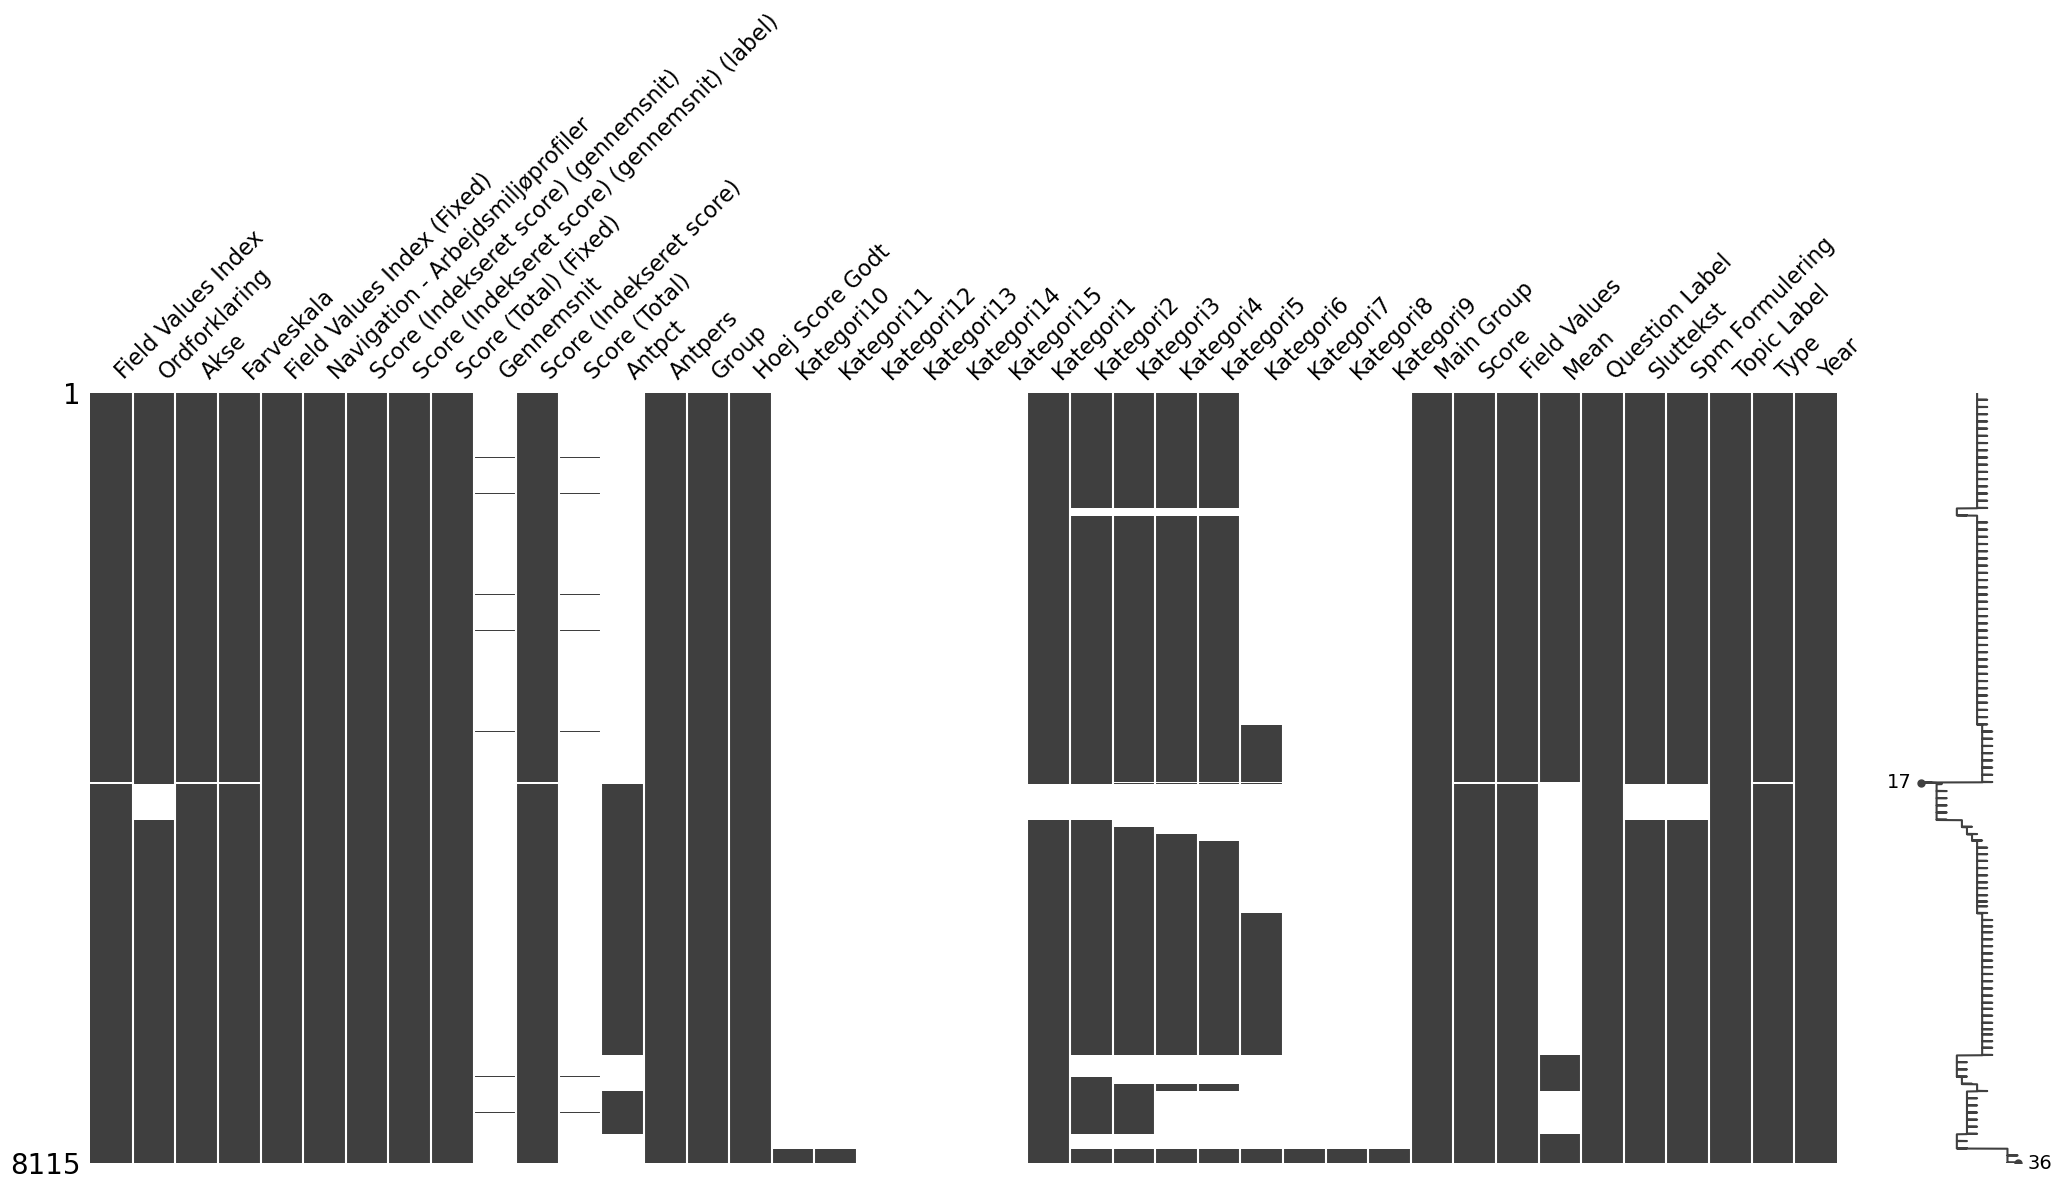

In [22]:
msno.matrix(branche_data)

<AxesSubplot: >

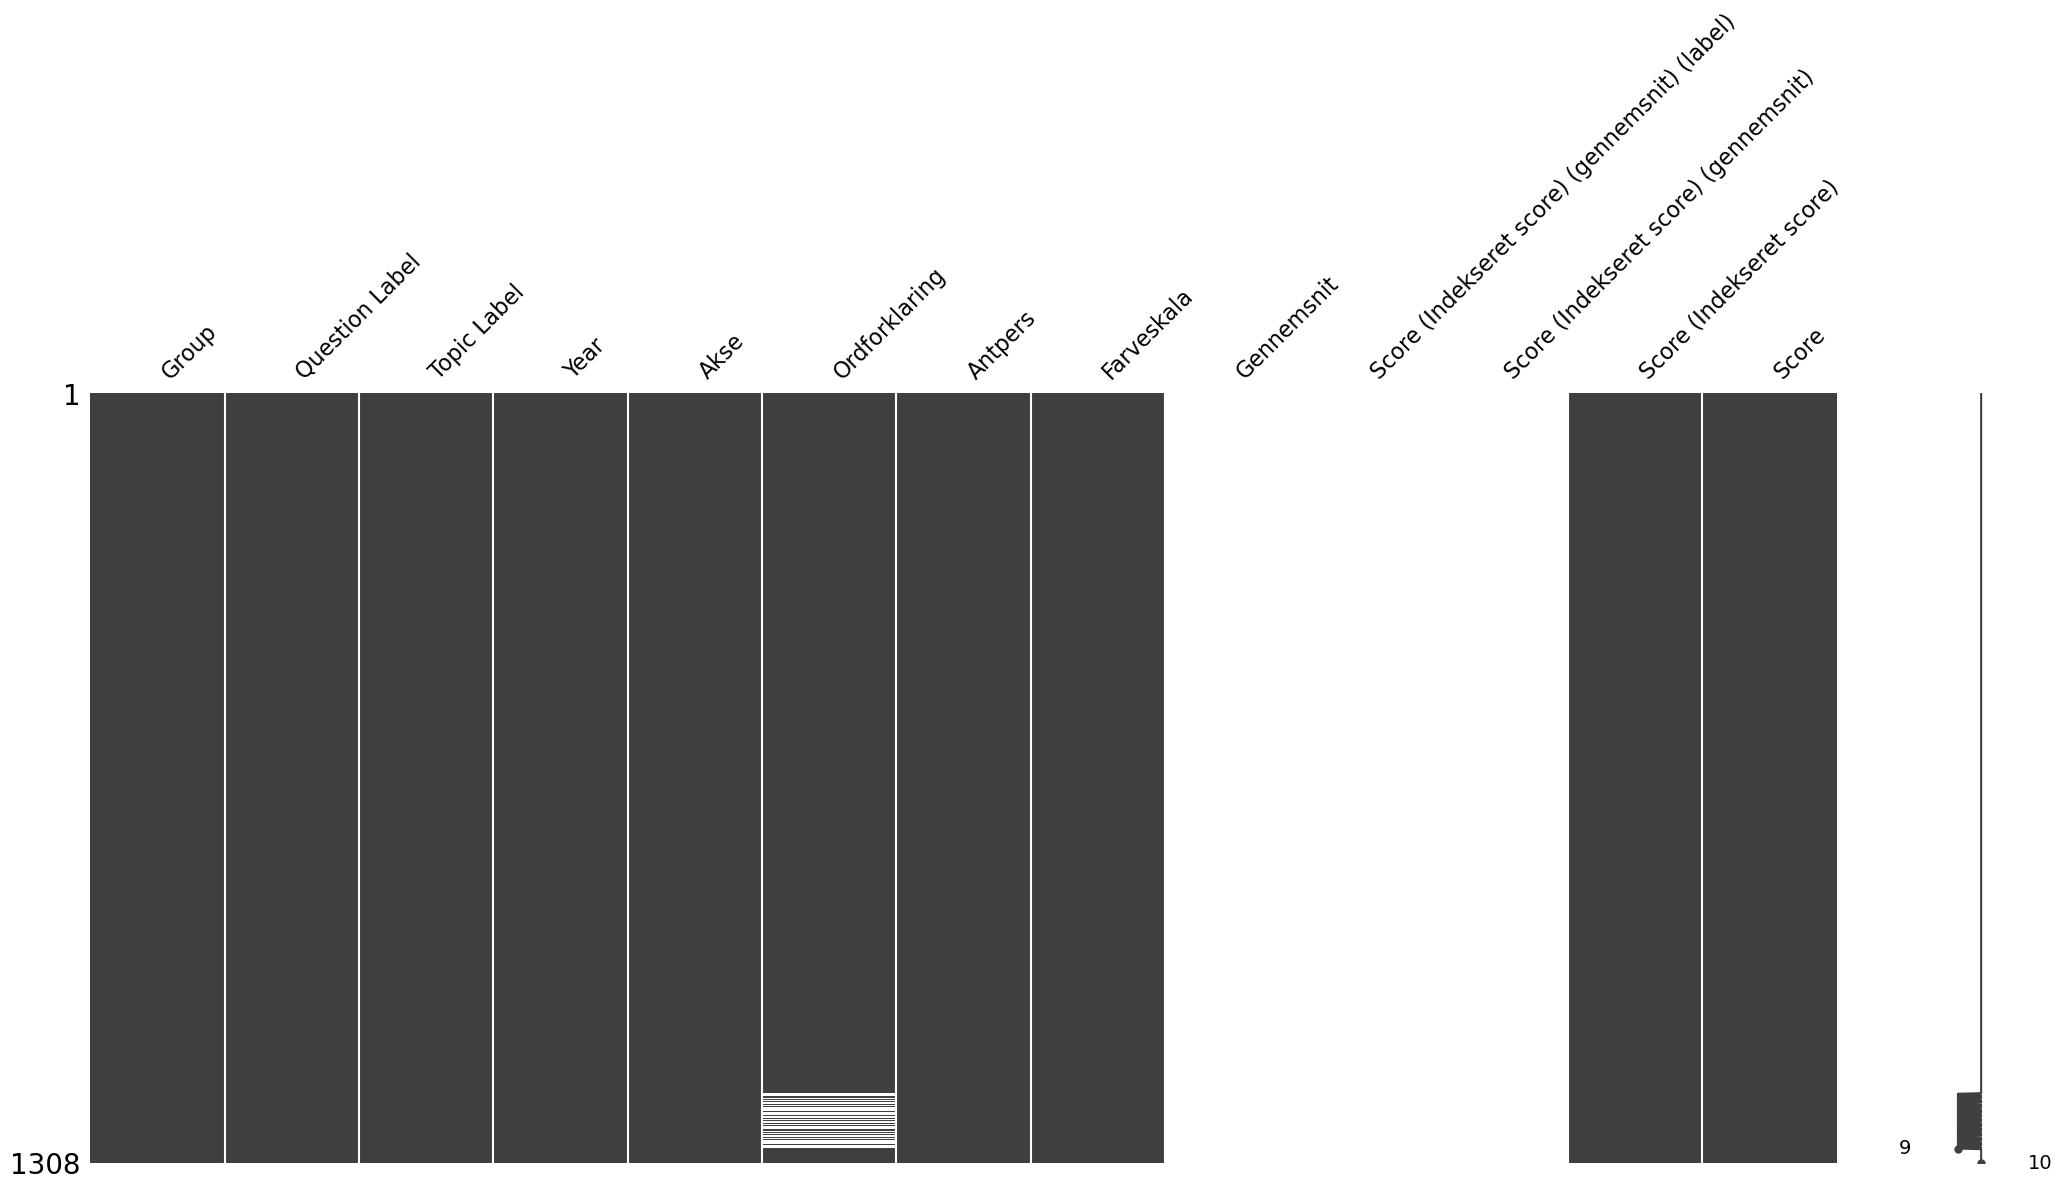

In [24]:
msno.matrix(koen_alder_data)


Ud fra graferne, kan man se at der skal laves nogle data transformations i preprocessing steppet for at gøre dataet klar til EDA (eksplorativ data analyse) og modellering. Dette ses bl.a. i kolonnen 'gennemsnit' for branche_data og koen_alder_data